In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"D:\\Data Analysis\Data Set\In Progress\jobs.csv\jobs.csv")

##### Display Basic Info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79147 entries, 0 to 79146
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_id           78667 non-null  float64
 1   job_role         78667 non-null  object 
 2   company          78666 non-null  object 
 3   experience       77398 non-null  object 
 4   salary           78667 non-null  object 
 5   location         77441 non-null  object 
 6   rating           42948 non-null  float64
 7   reviews          42948 non-null  object 
 8   resposibilities  78647 non-null  object 
 9   posted_on        78667 non-null  object 
 10  job_link         78667 non-null  object 
 11  company_link     78667 non-null  object 
dtypes: float64(2), object(10)
memory usage: 7.2+ MB


In [7]:
df.isnull().sum()

job_id               480
job_role             480
company              481
experience          1749
salary               480
location            1706
rating             36199
reviews            36199
resposibilities      500
posted_on            480
job_link             480
company_link         480
dtype: int64

#### Drop null values from column is nessary and changed it's data type (job_id, job_role, company)

In [9]:
df.dropna(subset=["job_role","company"], inplace=True)

In [10]:
df["job_id"]= df["job_id"].astype("int64")

#### Drop unnessary columns and duplicated values

In [12]:
df.drop(columns=["job_link","company_link"], inplace=True)

In [13]:
df[df.duplicated()]

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on
14180,30123501053,Process Associate-Trainee,Xome,0-1 Yrs,Not disclosed,"Chennai, Bangalore/Bengaluru",4.2,111 Reviews,"Training,Compliance,Mortgage,Diversity and Inc...",4 Days Ago
20860,60123500935,"Assistant Manager - Area Sales, Banca",SBI Card,5-6 Yrs,Not disclosed,Lucknow,3.8,2590 Reviews,"Relationship management,Administration,Excel,N...",1 Day Ago
21043,20422001589,Opening For Finance & Accounts,Murugappa Group,1-6 Yrs,Not disclosed,Chennai,4.1,6231 Reviews,"Finance,accounts,General Ledger Accounting,Acc...",8 Days Ago
22000,60123007983,Tool Design Engineer,Kalyani Maxion Wheels,1-3 Yrs,Not disclosed,Pune,4.2,113 Reviews,"Press Tool Design,Catia V5,Auto cad,Sheet Meta...",1 Day Ago
23765,311222003638,Synthetic R&D,Sami-sabinsa Group Limited,2-7 Yrs,Not disclosed,Bangalore Rural,3.2,100 Reviews,"nmr,MS Office,TLC",7 Days Ago
...,...,...,...,...,...,...,...,...,...,...
79142,60123006615,.Net Fullstack Developer,Citiustech,3-8 Yrs,"7,00,000 - 17,00,000 PA.","Hybrid - Pune, Bangalore/Bengaluru, Mumbai (Al...",4.0,742 Reviews,"c#,.net core,javascript,Microservices,Angular,...",2 Days Ago
79143,11222009693,Senior (BI) Business Intelligence Architect,Hexaware Technologies,10-13 Yrs,Not disclosed,"Hybrid - Pune, Chennai, Bangalore/Bengaluru, M...",3.7,3172 Reviews,"Informatica Mdm,etl,business intelligence,Agil...",1 Day Ago
79144,151222006599,PowerBI Developer,EY,5-10 Yrs,Not disclosed,"Hybrid - Pune, Mumbai (All Areas)",3.8,6267 Reviews,"pagination,Power Bi,Dax",2 Days Ago
79145,271222005611,Customer Service Associate,Tech Mahindra,0-2 Yrs,"2,50,000 - 3,50,000 PA.","Temp. WFH - Noida, Kolkata, New Delhi, Hyderab...",3.7,21440 Reviews,"Bengali,International BPO,BPO,Customer Service...",10 Days Ago


#### Check how the data looks like

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73344 entries, 0 to 73786
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_id           73344 non-null  int64  
 1   job_role         73344 non-null  object 
 2   company          73344 non-null  object 
 3   experience       72085 non-null  object 
 4   salary           73344 non-null  object 
 5   location         72128 non-null  object 
 6   rating           37786 non-null  float64
 7   reviews          37786 non-null  object 
 8   resposibilities  73324 non-null  object 
 9   posted_on        73344 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 6.2+ MB


In [17]:
df.isnull().sum()

job_id                 0
job_role               0
company                0
experience          1259
salary                 0
location            1216
rating             35558
reviews            35558
resposibilities       20
posted_on              0
dtype: int64

#### Filling Null Values

In [37]:
# Fill missing values in Experience column with "not specified"
df["experience"].fillna("0", inplace=True)

# Fill missing values in Location column with "not specified"
df["location"].fillna("not specified",inplace=True)

# Fill missing values in Responsibilities column with "not specified"
df["resposibilities"].fillna("not specified",inplace=True)

C:\Users\libha\AppData\Local\Temp\ipykernel_11932\4236210420.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["experience"].fillna("0", inplace=True)
C:\Users\libha\AppData\Local\Temp\ipykernel_11932\4236210420.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [39]:
df.isnull().sum()

job_id                 0
job_role               0
company                0
experience             0
salary                 0
location               0
rating             35558
reviews            35558
resposibilities        0
posted_on              0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73344 entries, 0 to 73786
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_id           73344 non-null  int64  
 1   job_role         73344 non-null  object 
 2   company          73344 non-null  object 
 3   experience       73344 non-null  object 
 4   salary           73344 non-null  object 
 5   location         73344 non-null  object 
 6   rating           37786 non-null  float64
 7   reviews          37786 non-null  object 
 8   resposibilities  73344 non-null  object 
 9   posted_on        73344 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 6.2+ MB


#### Extraction of Experience into Min and Max
#### Extraction of Salary into Min and Max

In [59]:
# Extract min and max experience using regex
df[["min_experience","max_experience"]]=df["experience"].str.extract(r'(\d+)-?(\d+)?')

# If Max experience is NaN,then fill it with Min experience
df["max_experience"]=df["max_experience"].fillna(df["min_experience"])

In [107]:
# Replace ',' from salary column
df["salary"] = df["salary"].str.replace(",", "", regex=True)

# Extract min and max salary using regex
df[["min_salary", "max_salary"]] = df["salary"].str.extract(r'(\d+)\s*-\s*(\d+)?')

# Convert to numeric type (handling missing values)
df["min_salary"] = pd.to_numeric(df["min_salary"], errors="coerce")
df["max_salary"] = pd.to_numeric(df["max_salary"], errors="coerce")

# If max_salary is NaN, fill it with min_salary
df["max_salary"] = df["max_salary"].fillna(df["min_salary"])

#### Change Min and Max Experience Data Type

In [114]:
df[["min_experience","max_experience"]]= df[["min_experience","max_experience"]].astype("float64")

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73344 entries, 0 to 73786
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_id           73344 non-null  int64  
 1   job_role         73344 non-null  object 
 2   company          73344 non-null  object 
 3   experience       73344 non-null  object 
 4   salary           73344 non-null  object 
 5   location         73344 non-null  object 
 6   rating           37786 non-null  float64
 7   reviews          37786 non-null  object 
 8   resposibilities  73344 non-null  object 
 9   posted_on        73344 non-null  object 
 10  min_experience   73344 non-null  float64
 11  max_experience   73344 non-null  float64
 12  min_salary       31979 non-null  float64
 13  max_salary       31979 non-null  float64
dtypes: float64(5), int64(1), object(8)
memory usage: 8.4+ MB


#### drop experience and salary columns (not needed anymore)

In [121]:
df.drop(columns=["experience","salary"],inplace=True)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73344 entries, 0 to 73786
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_id           73344 non-null  int64  
 1   job_role         73344 non-null  object 
 2   company          73344 non-null  object 
 3   location         73344 non-null  object 
 4   rating           37786 non-null  float64
 5   reviews          37786 non-null  object 
 6   resposibilities  73344 non-null  object 
 7   posted_on        73344 non-null  object 
 8   min_experience   73344 non-null  float64
 9   max_experience   73344 non-null  float64
 10  min_salary       31979 non-null  float64
 11  max_salary       31979 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 7.3+ MB


#### Treatment of Rating and Review Columns (Fill Mean in Rating Null, Change Datatype and Fill 0 in Null)

In [138]:
# Fill null values with Mean values
df["rating"].fillna(df["rating"].mean(),inplace=True)

# Fill null values with 0 and change it's data type as int64
df["reviews"] = pd.to_numeric(df["reviews"], errors='coerce')  # Convert text to numbers
df["reviews"].fillna(0, inplace=True)  # Now fill NaN with 0
df["reviews"]=df["reviews"].astype("int64") #Change data type to int64

C:\Users\libha\AppData\Local\Temp\ipykernel_11932\3429576505.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rating"].fillna(df["rating"].mean(),inplace=True)
C:\Users\libha\AppData\Local\Temp\ipykernel_11932\3429576505.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

## visualization

###### Key Job Market Insights
- The **most in-demand job roles** include [Top Roles from Data].
- **Top companies hiring** the most: [Top Companies from Data].
- **Job hotspots**: The majority of jobs are concentrated in [Top Cities].
- **Salary analysis**: Higher experience generally correlates with higher salaries.
- **Company ratings**: Most companies have ratings around [Most Common Rating].
- **Mode Of Work**: Most of the companies prefer [Most Common Mode Of Work]


#### Distribution of Job Ratings

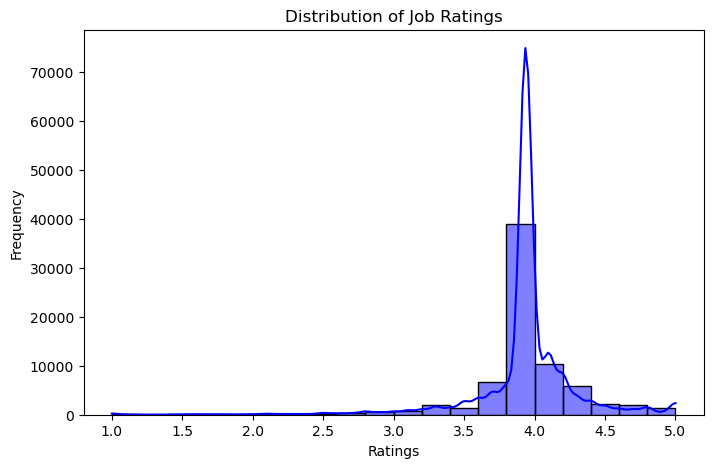

In [171]:
plt.figure(figsize=(8, 5))
sns.histplot(df["rating"], bins=20, kde=True, color="blue")
plt.title("Distribution of Job Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()

##### Insight: 
- Most job ratings are around 4.0, indicating a general satisfaction among employees.
- There are very few jobs rated below 3.0 or above 4.5.

#### Top 10 Companies Posting Jobs

C:\Users\libha\AppData\Local\Temp\ipykernel_11932\3762411025.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.index, y=top_companies.values, palette="coolwarm")


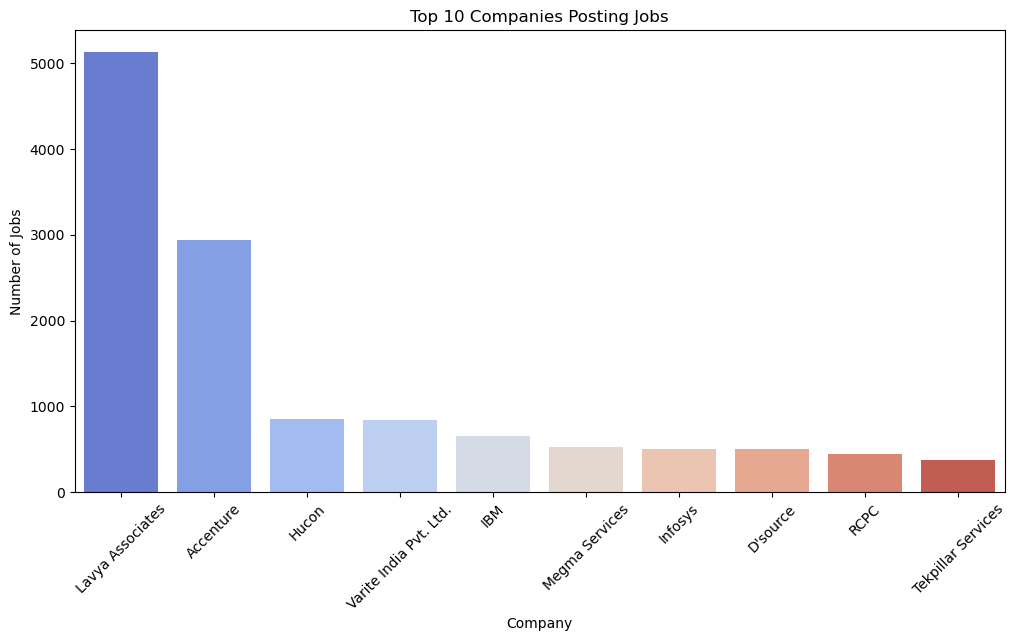

In [176]:
plt.figure(figsize=(12, 6))
top_companies = df["company"].value_counts().nlargest(10)
sns.barplot(x=top_companies.index, y=top_companies.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Companies Posting Jobs")
plt.xlabel("Company")
plt.ylabel("Number of Jobs")
plt.show()

##### Insights from the Top 10 Companies Posting Jobs:
- Lavya Associates is the top employer with over 5000 job listings.
- Accenture follows with nearly 3000 job openings.
- Other companies have fewer postings, indicating hiring concentration in major firms.
- IBM & Infosys have fewer job listings, suggesting selective hiring.
- Recruitment agencies like Hucon & Varite India are key job posters.

#### Max Min Salary Distribution

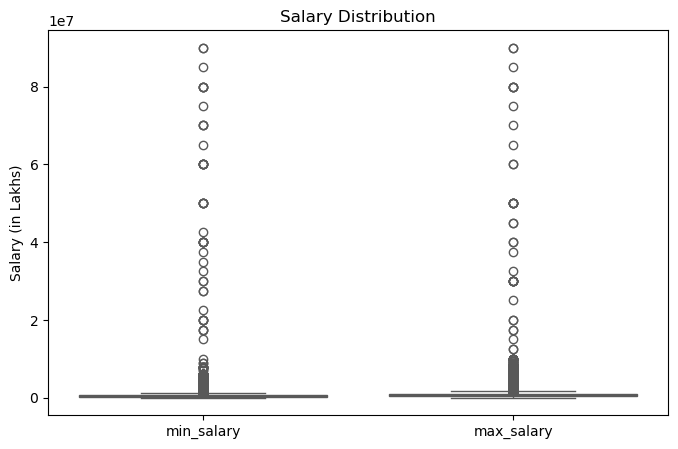

In [197]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[["min_salary", "max_salary"]], palette="Set2")
plt.title("Salary Distribution")
plt.ylabel("Salary (in Lakhs)")
plt.show()

##### Insights from the visualization
- The salary distribution has a large number of outliers, indicating that some job listings have extremely high salaries.
- Most salaries appear to be concentrated in a lower range, with a few extreme values pulling the distribution upwards.
- The presence of outliers suggests data inconsistencies or exceptionally high-paying jobs in the dataset.
- There is a similar distribution pattern for both min_salary and max_salary.

#### Scatter Plot of Experience vs. Salary

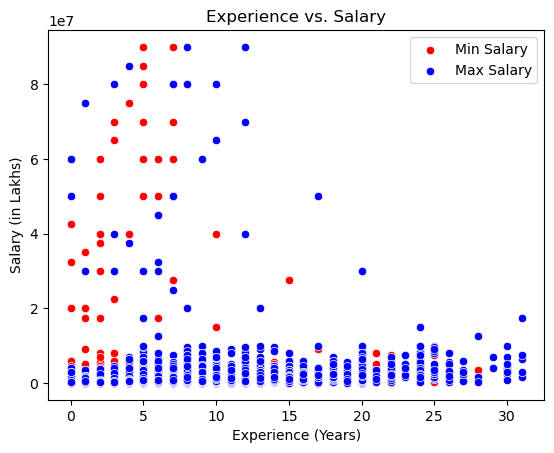

In [204]:
plt.figurefigsize=(8, 5)
sns.scatterplot(x=df["min_experience"], y=df["min_salary"], color="red", label="Min Salary")
sns.scatterplot(x=df["max_experience"], y=df["max_salary"], color="blue", label="Max Salary")
plt.xlabel("Experience (Years)")
plt.ylabel("Salary (in Lakhs)")
plt.title("Experience vs. Salary")
plt.legend()
plt.show()

##### Insights from Experience vs. Salary Visualization

- There is a noticeable concentration of salaries in the lower range for both minimum and maximum salaries.
- Higher salaries (both min and max) are mostly observed in the 0-10 years of experience range, suggesting lucrative opportunities for early-career professionals.
- Beyond 10 years of experience, salary variation becomes more stable with fewer extreme values.
- Some unusually high salaries exist across different experience levels, indicating potential data outliers or highly specialized roles.
- The maximum salary (blue dots) is generally higher than the minimum salary (red dots), as expected.

#### Most Common Job Roles

C:\Users\libha\AppData\Local\Temp\ipykernel_11932\4105098623.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_roles.index, y=top_roles.values, palette="viridis")


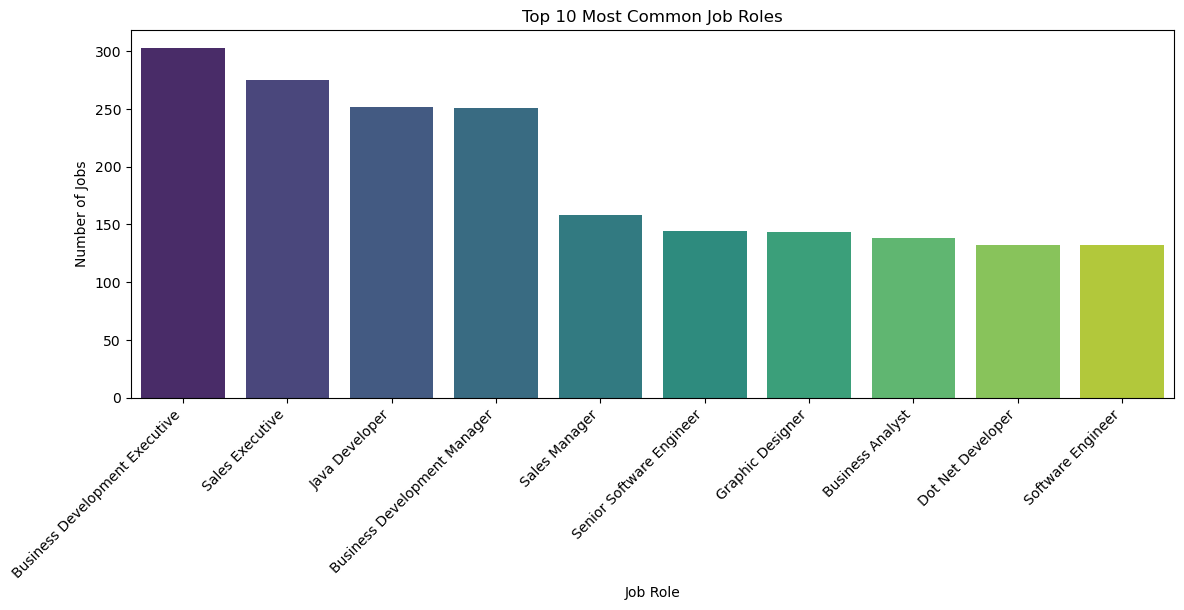

In [221]:
plt.figure(figsize=(12, 6))
top_roles = df["job_role"].value_counts().nlargest(10)
sns.barplot(x=top_roles.index, y=top_roles.values, palette="viridis")
plt.xticks(rotation=45, ha="right")  # Rotate labels for better alignment
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.title("Top 10 Most Common Job Roles")
plt.xlabel("Job Role")
plt.ylabel("Number of Jobs")
plt.show()

##### Insights:
- The most common job role is **Business Development Executive**, followed by **Sales Executive** and **Java Developer**.
- Business-related roles dominate the top positions, indicating a higher demand for business and sales professionals.
- Software development roles like **Java Developer, Dot Net Developer, and Software Engineer** are also in demand, but they appear lower in comparison to business-related roles.
- The number of jobs for **Business Development Executive** is significantly higher than for other roles, showing that companies are prioritizing business expansion.

#### Jobs Available by City

C:\Users\libha\AppData\Local\Temp\ipykernel_11932\2185438638.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.index, y=top_locations.values, palette="pastel")


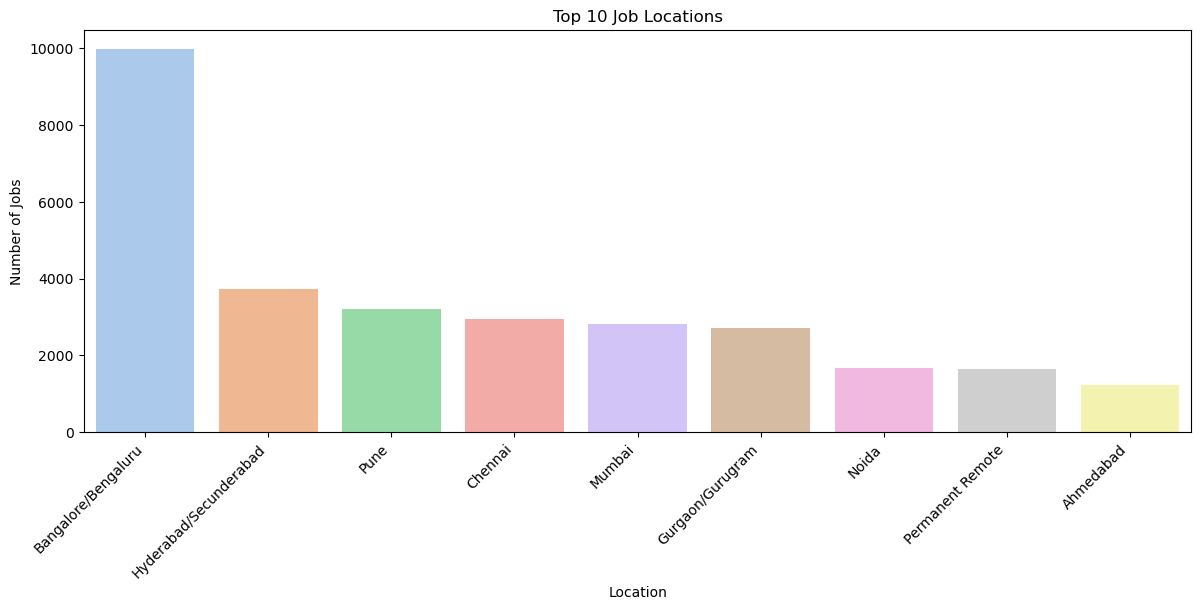

In [233]:
plt.figure(figsize=(12, 6))
top_locations = df["location"].value_counts().nlargest(9)
sns.barplot(x=top_locations.index, y=top_locations.values, palette="pastel")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.title("Top 10 Job Locations")
plt.xlabel("Location")
plt.ylabel("Number of Jobs")
plt.show()

##### Insights:
- **Bangalore/Bengaluru** has the highest number of job postings, significantly surpassing other cities, making it the top job hub.
- **Hyderabad/Secunderabad** comes second, followed by **Pune, Chennai, and Mumbai**, which also have a substantial number of job opportunities.
- **Gurgaon/Gurugram** also has a competitive job market, slightly behind Mumbai.
- **Noida and Permanent Remote roles** have fewer job postings compared to metro cities, but they still provide notable opportunities.
- **Ahmedabad** has the least number of jobs among the top 10 locations.
- This distribution suggests that major metropolitan cities continue to dominate the job market, with Bangalore leading by a large margin.


####  Correlation Heatmap

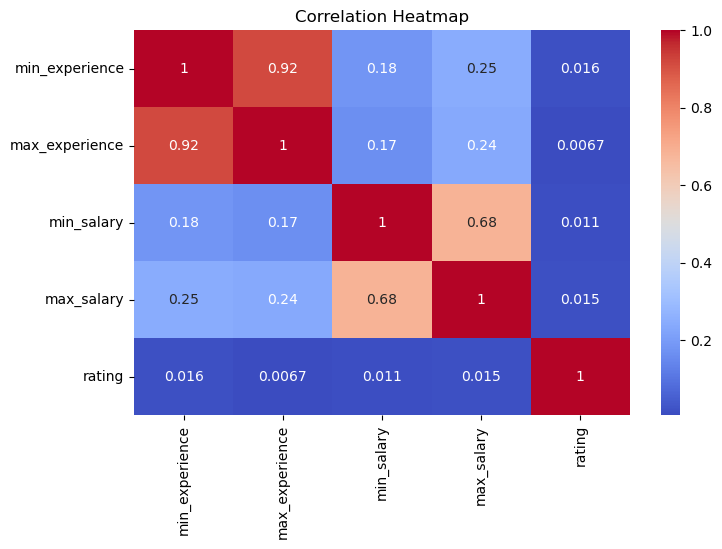

In [237]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[["min_experience", "max_experience", "min_salary", "max_salary", "rating"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

##### Insights from Correlation Heatmap:

- **Min Experience and Max Experience** have a very strong positive correlation (**0.92**), indicating that jobs requiring more experience at the minimum level also tend to require more at the maximum level.
- **Min Salary and Max Salary** also show a strong correlation (**0.68**), which is expected as salary ranges usually scale proportionally.
- **Experience and Salary** have a weak correlation (**0.17 - 0.25**), suggesting that while experience affects salary, other factors also play a significant role.
- **Rating has little to no correlation** with any other variable, implying that company ratings are independent of experience or salary.

#### Mode Of Work Companies Prefer

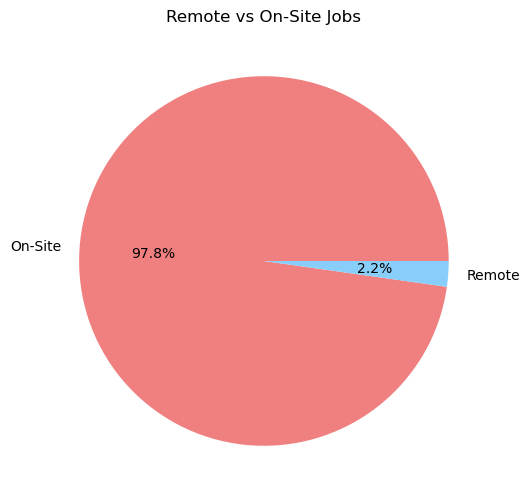

In [244]:
remote_counts = df['location'].str.contains("Remote").value_counts()
plt.figure(figsize=(6,6))
plt.pie(remote_counts, labels=["On-Site", "Remote"], autopct="%1.1f%%", colors=['lightcoral', 'lightskyblue'])
plt.title("Remote vs On-Site Jobs")
plt.show()

##### Insight:
- The pie chart shows that the majority of job postings are **On-Site (97.8%)**, while **Remote jobs account for only 2.2%**.
- This indicates that remote job opportunities are **very limited** in the dataset.
- If you are looking for remote work, you might need to **expand your job search** or focus on companies offering flexible work options.

## Key Job Market Insights
- The **most in-demand job roles** include [Business Development Executive].
- **Top companies hiring** the most: [Lavya Associates].
- **Job hotspots**: The majority of jobs are concentrated in [Banglore/Bangluru].
- **Salary Analysis**: Experience impacts salary, but **other factors like job role, industry, and skills may have a stronger influence**.
- **Company ratings**: Most companies have ratings around [4.0].
- **Mode Of Work**: Most of the companies prefer [On-Site]